In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
from funzioni import plot_bias_atmos
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_atmos
from funzioni import plot_mean_cluster_tos
from funzioni import plot_bias_2_models_atmos
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_atmos
from funzioni import plot_zonavg
from funzioni import plot_zonavg_2_cluster
from funzioni import plot_mean_cluster_zonavg
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonavg
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random

Caricamento dei file pickle

In [2]:
# Caricamento di models e models_atmos
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
    era_na_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    list_cluster4 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    atmos_cluster4 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)
    atmos_cluster4_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)
    atmos_cluster4_std = pickle.load(f)

Bootstrap

In [3]:
#creazione di una lista con il nome dei modelli
list_name_models_atmos = []
for name in models_atmos.keys():
    list_name_models_atmos.append(name)

Cluster 0 (4 modelli)

In [4]:
#estraggo 4 modelli in modo casuale per 100 volte
n_samplings = 1000 #numero di volte che estraggo 4 modelli in modo random
n_models = 4 #numero di modelli per il cluster 0
sample_rand = [] #inizializzazione lista di modelli presi in modo random, in numero n_samplings
sample_mean = [] #inizializzazione di una lista in cui vado ad inserire la media di ogni sample, preso con l'estrazione random
for n in range(n_samplings): #itero n_samplings volte
    sample_rand = random.sample(range(0,36), n_models) #lista = estraggo 4 numeri random da 0 a 36, che sono il numero associato ad ogni modello
    sample_sum = 0 #inizializzazione ad ogni iterazione di sample_sum
    for i in range(n_models): #ciclo sui 4 modelli presi
        sample_sum += models_atmos[list_name_models_atmos[sample_rand[i]]]['atmos North Atlantic bias DJF']
    sample_mean.append(sample_sum/len(sample_rand)) #calcolo il valore medio per ogni cluster

In [5]:
sample_mean[0]

<xarray.DataArray (plev: 1, lat: 30, lon: 78)> Size: 9kB
array([[[-1.0011411 , -1.04896   , -1.0799783 , ..., -1.1037245 ,
         -1.0801444 , -1.0396016 ],
        [-1.0015032 , -1.0183644 , -1.0236518 , ..., -0.9672427 ,
         -0.74738544, -0.87172645],
        [-0.96088654, -0.94111496, -0.8947958 , ..., -0.19254479,
         -0.43545455, -0.68720126],
        ...,
        [-0.22759283, -0.23747954, -0.22283709, ..., -0.71737885,
         -0.6817418 , -0.6817012 ],
        [-0.30252916, -0.27505964, -0.24427761, ..., -0.57667553,
         -0.6011832 , -0.63190925],
        [-0.19927628, -0.12633531, -0.05815448, ..., -0.46005595,
         -0.46583286, -0.4867795 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 240B 21.0 23.0 25.0 27.0 29.0 ... 73.0 75.0 77.0 79.0
  * lon      (lon) float64 624B -124.0 -122.0 -120.0 -118.0 ... 26.0 28.0 30.0
  * plev     (plev) float64 8B 8.5e+04

Esempio con un solo punto griglia

In [6]:
#A questo punto ho tutte le medie, dovrei calcolare la distribuzione delle medie per ogni punto griglia
#Poi considero il quinto e il 95-esimo percentile per la distribuzione di ogni punto griglia
#Confronto poi con l'ij-esimo punto griglia del cluster 0 medio per vedere se ogni punto griglia è significativo o no
a = np.zeros(n_samplings)
for n in range(n_samplings):
    a[n] = sample_mean[n][0][0][0] #prima iterazione, plev fissato, primo elemento lon, primo elemento lat

(array([ 10.,  41., 121., 219., 182., 174., 129.,  77.,  31.,  16.]),
 array([-1.28683949, -1.13501768, -0.98319588, -0.83137407, -0.67955227,
        -0.52773046, -0.37590866, -0.22408686, -0.07226505,  0.07955675,
         0.23137856]),
 <BarContainer object of 10 artists>)

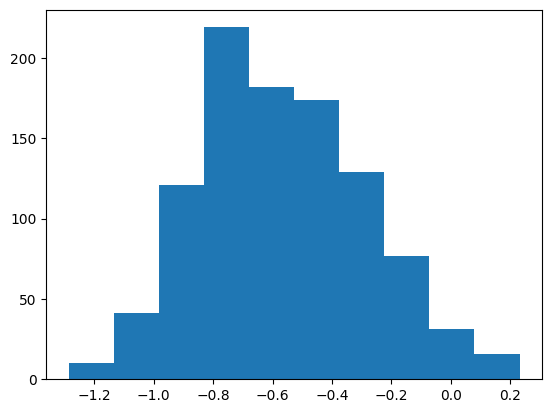

In [7]:
#plot dell'istogramma per la distribuzione del primo punto griglia
plt.hist(a)

In [8]:
# media e la deviazione standard
media = np.mean(a)
deviazione_standard = np.std(a, ddof=1)  # Specifica ddof=1 per calcolare la deviazione standard campionaria

# quinto e il 95-esimo percentile
quinto_percentile = np.percentile(a, 5)
novantacinquesimo_percentile = np.percentile(a, 95)
print(media,deviazione_standard, quinto_percentile, novantacinquesimo_percentile)

-0.5659631749987603 0.27880644713852126 -0.9863556027412415 -0.08117752671241767


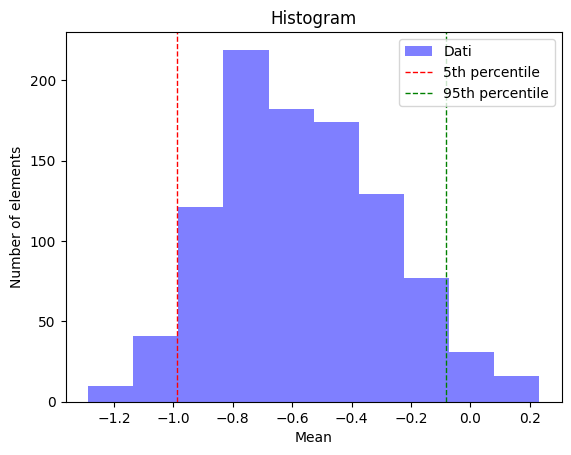

In [9]:
# Traccia l'istogramma
plt.hist(a, bins=10, alpha=0.5, color='blue', label='Dati')

# Aggiungi una linea verticale per il quinto percentile
plt.axvline(quinto_percentile, color='red', linestyle='dashed', linewidth=1, label='5th percentile')

# Aggiungi una linea verticale per il 95-esimo percentile
plt.axvline(novantacinquesimo_percentile, color='green', linestyle='dashed', linewidth=1, label='95th percentile')

# Aggiungi etichette, titolo e legenda
plt.xlabel('Mean')
plt.ylabel('Number of elements')
plt.title('Histogram')
plt.legend()

# Mostra il plot
plt.show()


Cluster 0, 4 modelli: ['CAMS-CSM1-0', 'CanESM5', 'E3SM-1-0', 'NESM3']

In [10]:
list_cluster0

['CAMS-CSM1-0', 'CanESM5', 'E3SM-1-0', 'NESM3']

In [11]:
sum_bias = 0
#calcolo il valor medio
for i in range(len(list_cluster0)):
    model_name = list_cluster0[i]
    sum_bias = sum_bias + models_atmos[model_name]['atmos North Atlantic bias DJF']
#valor medio
mean_bias = sum_bias / len(list_cluster0)

In [12]:
print(mean_bias[0][0][0])
print(quinto_percentile)
print(novantacinquesimo_percentile)

<xarray.DataArray ()> Size: 4B
array(-0.7697823, dtype=float32)
Coordinates:
    lat      float64 8B 21.0
    lon      float64 8B -124.0
    plev     float64 8B 8.5e+04
-0.9863556027412415
-0.08117752671241767


In [13]:
len(sample_mean[0].lon)

78

Tutto il box lonxlat

In [23]:
#Inizializzazione array
cell_grid_iteration = np.zeros(n_samplings) #array in cui metto i valori medi di un solo punto griglia per iterazioni diverse
array_mean = np.zeros((len(sample_mean[0].lat),len(sample_mean[0].lon))) #array che racchiude i valori medi delle distribuzioni per ogni punto griglia
array_std = np.zeros((len(sample_mean[0].lat),len(sample_mean[0].lon))) #array che racchiude le deviazioni standard delle distribuzioni per ogni punto griglia
array_5th_percentile = np.zeros((len(sample_mean[0].lat),len(sample_mean[0].lon))) #array che racchiude i valori in cui si ha il 5th percentile delle distribuzioni per ogni pt griglia
array_95th_percentile = np.zeros((len(sample_mean[0].lat),len(sample_mean[0].lon))) #array che racchiude i valori in cui si ha il 95th percentile delle distribuzioni per ogni pt griglia
#Determino mean, std, 5th-95th percentile delle distribuzioni per ogni pt griglia
for i in range(len(sample_mean[0].lat)): #ciclo sulle latitudini
    for j in range(len(sample_mean[0].lon)): #ciclo sulle longitudini
        for n in range(n_samplings): #ciclo sulle iterazioni
            cell_grid_iteration[n] = sample_mean[n][0][i][j] #n-esima iterazione, plev fissato, i-esimo elemento lat, primo elemento lon
        #Fuori dalle iterazioni perché ragiono sulla distribuzione, ottenuta dopo tutte le iterazioni
        # media e la deviazione standard
        array_mean[i,j] = np.mean(cell_grid_iteration)
        array_std[i,j] = np.std(cell_grid_iteration, ddof=1)  # Specifica ddof=1 per calcolare la deviazione standard campionaria
        # quinto e il 95-esimo percentile
        array_5th_percentile[i,j] = np.percentile(cell_grid_iteration, 5)
        array_95th_percentile[i,j] = np.percentile(cell_grid_iteration, 95)

Plot di cluster 0 mean

Text(0.5, 1.02, 'Cluster 0 medio, with originals models (4)')

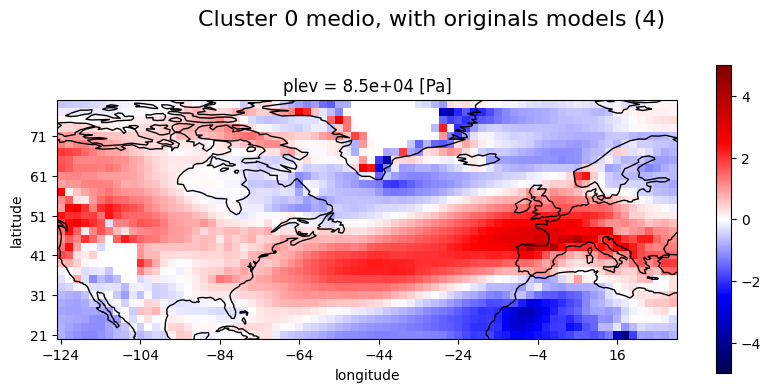

In [30]:
plot_mod = mean_bias[0].plot.pcolormesh(figsize=(10,4),vmin=-5, vmax=5,cmap='seismic',subplot_kws={"projection":ccrs.PlateCarree()})  
plt.xticks(np.arange(mean_bias[0].lon.min(),mean_bias[0].lon.max(), 20))
plt.yticks(np.arange(mean_bias[0].lat.min(),mean_bias[0].lat.max(), 10))
plt.gca().coastlines() #gca = get current axis
plt.ylabel('latitude')
plt.xlabel('longitude')
# Titolo
plt.suptitle('Cluster 0 medio, with originals models (4)', fontsize=16, y=1.02)

Plot 5th-95th percentile, mean-std Cluster 0

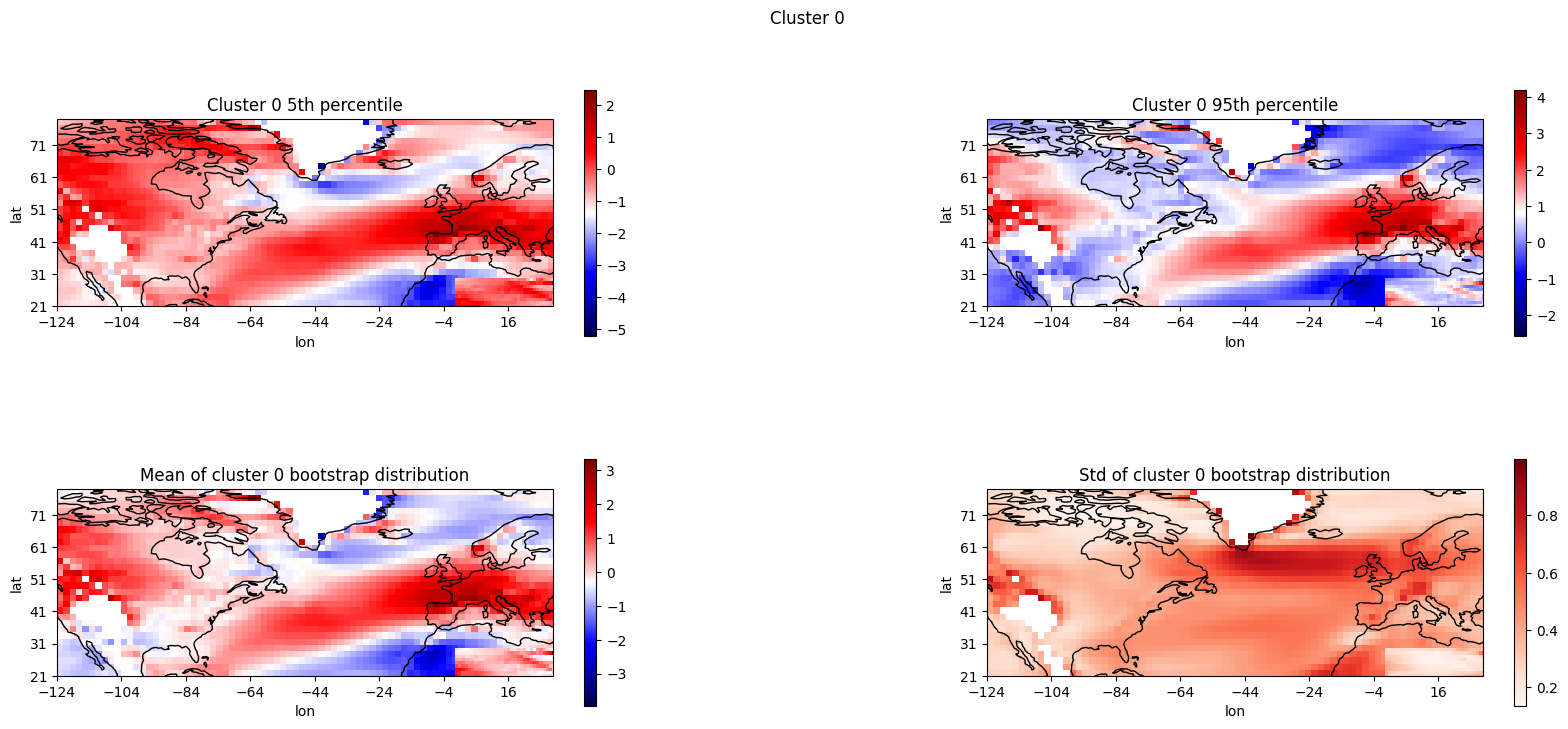

In [76]:
fig, ax = plt.subplots(nrows=int(n_models/2), ncols=int(n_models/2), figsize=(20,8), subplot_kw={"projection": ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots

#valori estremanti di lon-lat
min_lon = mean_bias[0].lon.min()
max_lon = mean_bias[0].lon.max()
min_lat = mean_bias[0].lat.min()
max_lat = mean_bias[0].lat.max()

ax[0,0].imshow(array_5th_percentile[::-1], cmap='seismic', extent=[min_lon, max_lon, min_lat, max_lat], transform=ccrs.PlateCarree())
ax[0,0].invert_yaxis()
ax[0,0].set_title('Cluster 0 5th percentile')
fig.colorbar(ax[0,0].imshow(array_5th_percentile, cmap='seismic'), ax=ax[0,0])

ax[0,1].imshow(array_95th_percentile[::-1], cmap='seismic', extent=[min_lon, max_lon, min_lat, max_lat], transform=ccrs.PlateCarree())
ax[0,1].invert_yaxis()
ax[0,1].set_title('Cluster 0 95th percentile')
fig.colorbar(ax[0,1].imshow(array_95th_percentile, cmap='seismic'), ax=ax[0,1])

ax[1,0].imshow(array_mean[::-1], cmap='seismic', extent=[min_lon, max_lon, min_lat, max_lat], transform=ccrs.PlateCarree())
ax[1,0].invert_yaxis()
ax[1,0].set_title('Mean of bootstrap distribution')
fig.colorbar(ax[1,0].imshow(array_mean, cmap='seismic'), ax=ax[1,0])

ax[1,1].imshow(array_std[::-1], cmap='Reds', extent=[min_lon, max_lon, min_lat, max_lat], transform=ccrs.PlateCarree())
ax[1,1].invert_yaxis()
ax[1,1].set_title('Std of bootstrap distribution')
fig.colorbar(ax[1,1].imshow(array_std, cmap='Reds'), ax=ax[1,1])

#invert y axis and set ticks on x-y axes
for i in range(int(n_models/2)):
    for j in range(int(n_models/2)):
        #ax[i,j].invert_yaxis()
        #ax[i,j].set_xlim(mean_bias[0].lon.min(),mean_bias[0].lon.max())
        #ax[i,j].set_ylim(mean_bias[0].lat.min(),mean_bias[0].lat.max())
        ax[i,j].set_xlabel('lon')
        ax[i,j].set_ylabel('lat')
        ax[i,j].set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
        ax[i,j].coastlines()        
        ax[i,j].set_xticks(np.arange(mean_bias[0].lon.min(),mean_bias[0].lon.max(), 20))
        ax[i,j].set_yticks(np.arange(mean_bias[0].lat.min(),mean_bias[0].lat.max(), 10))
fig.suptitle('Cluster 0')
fig.show()